# Pandas Practice 3 (Bike Share Data)

As a data scientist, you don't always have to invent the wheel from scratch. The great advantage of Python is that smart people before you spend a lot of energy on making life easier for the next programers. So please, make your life easier and use code that has already been implemented, don't call it "copying" but "friendly borrowing" of other people's code. If you copy whole functions or great graphs in the future, don't forget to give props to the inventor!

So for this exercise, too, if you get stuck at any point, look at good solutions from others and learn a lot from them about how to solve these problems even better.
Here are two good resources for small code snippet which can be very helpful when dealing with DataFrames:

- [Sebastian Raschkas "Things in Pandas I Wish I'd Known Earlier"](https://nbviewer.jupyter.org/github/rasbt/python_reference/blob/master/tutorials/things_in_pandas.ipynb)
- [Chris Albons set of code snippets](https://chrisalbon.com/)


**By the end of this session you should be able to**
- Explore data with pandas to answer conceptual questions
- Write chained commands for efficient one-liners


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
%timeit df = pd.read_csv('data/bike_share_201402_trip_data.csv')

140 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


How many observations are there?

In [4]:
df.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


Change the columns to be pythonic:

- lowercase 
- replace " " with `_` as a separator
- replace "#" with `num` 


In [7]:
#lowercase
df.columns = df.columns.str.lower()
# replace " "
df.columns = df.columns.str.replace(" ", "_")

# replace #
df.columns = df.columns.str.replace("#", "num")


How many types of subscription options are there? What are the different subscription types?

In [12]:
print("Type #:", df.subscription_type.nunique())
print("Type:", df.subscription_type.unique())

Type #: 2
Type: ['Subscriber' 'Customer']


What is the frequency of each subscription option?

In [17]:
df.subscription_type.value_counts()

subscription_type
Subscriber    113647
Customer       30368
Name: count, dtype: int64

Please plot the frequency of each subscription option with a pie chart:

<Axes: ylabel='count'>

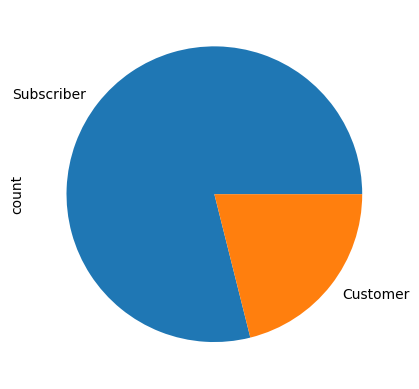

In [18]:
df.subscription_type.value_counts().plot(kind="pie")

Please plot the frequency of each subscription option with a bar chart:

<Axes: xlabel='subscription_type'>

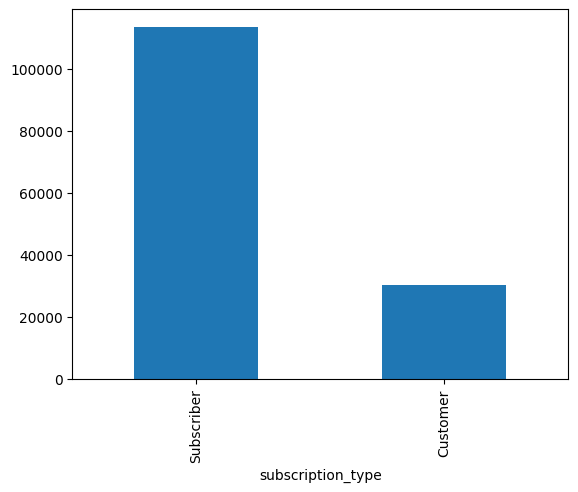

In [19]:
df.subscription_type.value_counts().plot(kind="bar")

Have a look at the start_station column: Which 10 stations occur most frequently?

In [25]:
df.start_station.value_counts().sort_values(ascending=False)[:10]

start_station
San Francisco Caltrain (Townsend at 4th)         9838
Harry Bridges Plaza (Ferry Building)             7343
Embarcadero at Sansome                           6545
Market at Sansome                                5922
Temporary Transbay Terminal (Howard at Beale)    5113
Market at 4th                                    5030
2nd at Townsend                                  4987
San Francisco Caltrain 2 (330 Townsend)          4976
Steuart at Market                                4913
Townsend at 7th                                  4493
Name: count, dtype: int64

Now look at the end_station column: Which 10 stations occur the least often?

In [27]:
df.end_station.value_counts().sort_values(ascending=False).tail(10)

end_station
Broadway St at Battery St           205
Redwood City Medical Center         178
Castro Street and El Camino Real    129
Redwood City Public Library         117
San Mateo County Center             106
Franklin at Maple                    93
San Antonio Shopping Center          93
Broadway at Main                     56
San Jose Government Center           23
Mezes Park                            5
Name: count, dtype: int64

Create a table that has start_station segmented by subscription_type and include also the row/column margins (subtotals). If you are not sure how to do it, check out the documentation for `pd.crosstab()`.

In [28]:
pd.crosstab(df.start_station, df.subscription_type)

subscription_type,Customer,Subscriber
start_station,,
2nd at Folsom,427,3349
2nd at South Park,535,3923
2nd at Townsend,882,4105
5th at Howard,606,2029
Adobe on Almaden,75,260
...,...,...
Temporary Transbay Terminal (Howard at Beale),427,4686
Townsend at 7th,518,3975
University and Emerson,328,106


Let's look at the duration... Which unit do you think is used here?

How long is the shortest trip? How many are that short?

In [30]:
df.duration.min()

60

What do you think is going on with the short trips?

In [37]:
df[df.duration == 60]

# directly returned back

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_num,subscription_type,zip_code
2887,8576,60,9/2/2013 9:40,Harry Bridges Plaza (Ferry Building),50,9/2/2013 9:41,Harry Bridges Plaza (Ferry Building),50,354,Subscriber,94102
2925,8651,60,9/2/2013 10:50,San Francisco Caltrain 2 (330 Townsend),69,9/2/2013 10:51,San Francisco Caltrain 2 (330 Townsend),69,544,Subscriber,94107
3535,9444,60,9/3/2013 8:37,Redwood City Public Library,24,9/3/2013 8:38,Redwood City Public Library,24,239,Subscriber,94105
7296,14644,60,9/8/2013 13:55,San Francisco Caltrain (Townsend at 4th),70,9/8/2013 13:56,San Francisco Caltrain (Townsend at 4th),70,521,Subscriber,95126
10457,18792,60,9/12/2013 10:09,Civic Center BART (7th at Market),72,9/12/2013 10:10,Civic Center BART (7th at Market),72,632,Subscriber,94103
11545,20271,60,9/13/2013 12:43,Market at 4th,76,9/13/2013 12:44,Market at 4th,76,500,Subscriber,94116
13437,22689,60,9/15/2013 21:15,Embarcadero at Sansome,60,9/15/2013 21:16,Embarcadero at Sansome,60,577,Subscriber,94111
20568,32159,60,9/23/2013 18:53,Townsend at 7th,65,9/23/2013 18:54,Townsend at 7th,65,566,Subscriber,94107
40000,57581,60,10/14/2013 14:47,Clay at Battery,41,10/14/2013 14:48,Clay at Battery,41,368,Subscriber,94158
55127,77650,60,10/30/2013 18:22,Harry Bridges Plaza (Ferry Building),50,10/30/2013 18:23,Harry Bridges Plaza (Ferry Building),50,416,Subscriber,94110


What is the longest trip?

In [39]:
df.duration.sort_values(ascending=False)[:1]

80510    722236
Name: duration, dtype: int64

How would you define a "long" trip? How many trips are "long" according to your definition?

In [42]:
df.duration.describe()
df.duration.quantile(q=0.95)

2479.5999999999767

Longer than 95% of trips

In [51]:
df.query("duration > duration.quantile(q=0.95)").duration.shape

(7201,)

Do the long durations seem reasonable? Why are they so long? What could it tell us about the users?

In [52]:
df.duration.quantile(q=0.95)/60/60 # in hours

0.6887777777777713

Plot the duration column.

<Axes: ylabel='Frequency'>

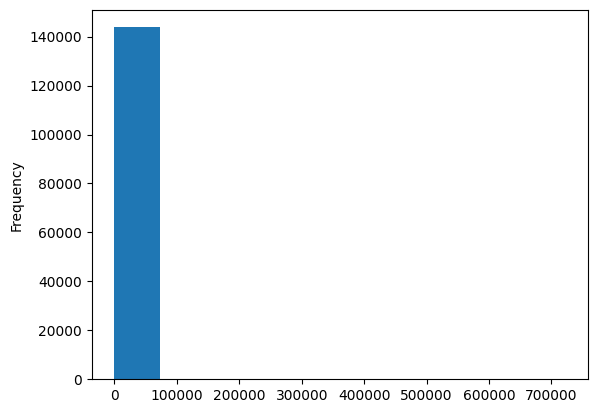

In [55]:
df.duration.plot()

Does this plot give any insights?

No 

Select subsections of the data to make plots that provide more insights.

subscription_type
Customer      Axes(0.125,0.11;0.775x0.77)
Subscriber    Axes(0.125,0.11;0.775x0.77)
Name: duration, dtype: object

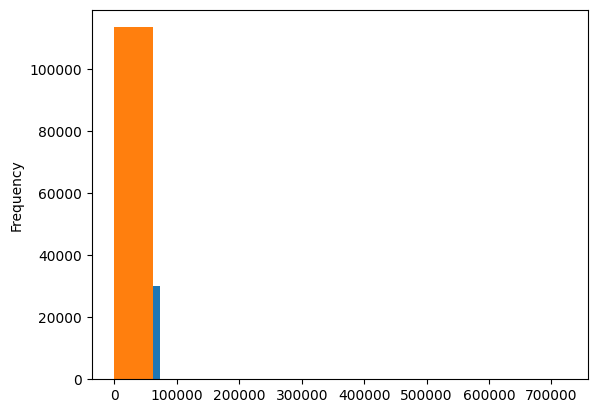

In [56]:
df.groupby("subscription_type").duration.plot(kind="hist")

The Product Team would like all of the station names to be lower case and  with `_` as a separator

`South Van Ness at Market` -> `south_van_ness_at_market`  

**DO NOT USE A FOR LOOP. THEY ARE THE 👿**

In [68]:
df["start_station"] = df.start_station.str.lower().str.replace(" ", "_")
df["end_station"] = df.start_station.str.lower().str.replace(" ", "_")


Now take a timer and set it to 15 minutes. Take this time to explore the data guided by your own intuition or hypotheses…
> Timeboxing is a helpful approach when working with a new dataset so you won't fall into any rabbit holes. 

In [70]:
df.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_num,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,south_van_ness_at_market,66,8/29/2013 14:14,south_van_ness_at_market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,san_jose_city_hall,10,8/29/2013 14:43,san_jose_city_hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,mountain_view_city_hall,27,8/29/2013 10:17,mountain_view_city_hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,san_jose_city_hall,10,8/29/2013 11:30,san_jose_city_hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,south_van_ness_at_market,66,8/29/2013 12:04,south_van_ness_at_market,67,319,Subscriber,94103


<Axes: ylabel='Frequency'>

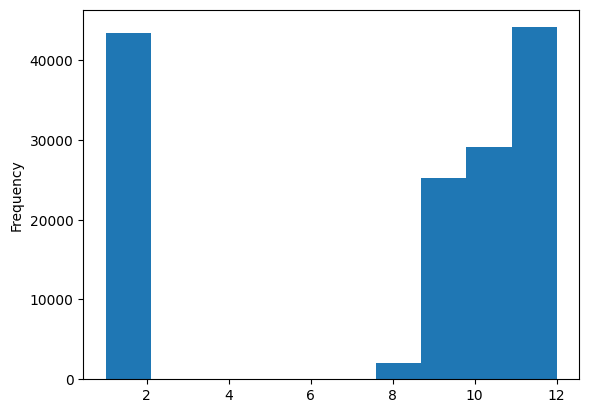

In [106]:
df.start_date = pd.to_datetime(df.start_date)


df.start_date.dt.month.plot(kind="hist")


<Axes: ylabel='Frequency'>

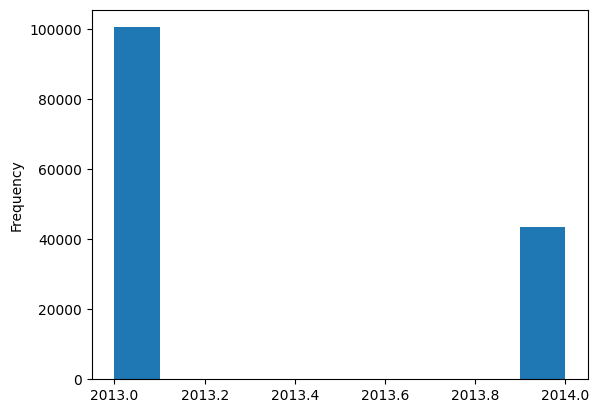

In [107]:
df.start_date.dt.year.plot(kind="hist")

<Axes: ylabel='Frequency'>

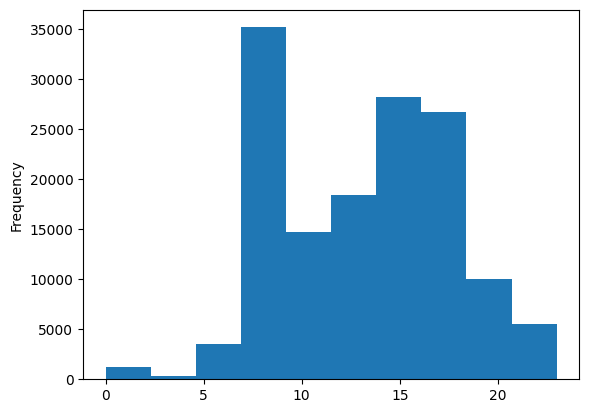

In [105]:
df.start_date.dt.hour.plot(kind="hist")